# Neural Networks

### Comparing performance of "vanilla" multilayer perceptron (MLP) with "vanilla" MLP + dropout and "vanilla" MLP + batch normalization on the Fashion MNIST dataset

In [1]:
import sklearn
import keras
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 1us/step


In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
# Divide by 255 since range is 0 to 255
X_train /= 255
X_test /= 255

In [6]:
X_train.shape

(60000, 784)

In [7]:
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [ ]:
num_classes = 10
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## "Vanilla" model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

basic_model = Sequential(
    [
        # 1st hidden layer
        Dense(196, input_shape = (784, )),
        Activation('relu'),
     
        # 2nd hidden layer
        Dense(49),
        Activation('relu'),
     
        # Output layer
        Dense(10),
        Activation('softmax')
    ]
)

In [ ]:
basic_model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [16]:
# Validation split = 1/6 gives us 10000 samples since we 60000 training samples
basic_model_history = basic_model.fit(X_train, y_train, batch_size = 8, epochs = 25, verbose = 1, validation_split = 1/6)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 19s 376us/step - loss: 0.3341 - accuracy: 0.8766 - val_loss: 0.3904 - val_accuracy: 0.8631
Epoch 2/25
50000/50000 [==============================] - 19s 374us/step - loss: 0.3157 - accuracy: 0.8837 - val_loss: 0.3603 - val_accuracy: 0.8742
Epoch 3/25
50000/50000 [==============================] - 19s 385us/step - loss: 0.2959 - accuracy: 0.8904 - val_loss: 0.3500 - val_accuracy: 0.8781
Epoch 4/25
50000/50000 [==============================] - 19s 378us/step - loss: 0.2830 - accuracy: 0.8946 - val_loss: 0.3521 - val_accuracy: 0.8736
Epoch 5/25
50000/50000 [==============================] - 19s 373us/step - loss: 0.2718 - accuracy: 0.8981 - val_loss: 0.3396 - val_accuracy: 0.8837
Epoch 6/25
50000/50000 [==============================] - 19s 380us/step - loss: 0.2659 - accuracy: 0.9012 - val_loss: 0.3296 - val_accuracy: 0.8864
Epoch 7/25
50000/50000 [==============================] 

In [49]:
basic_model_score = basic_model.evaluate(X_test, y_test)
print("\"Vanilla\" model test loss: {:.3f}".format(basic_model_score[0]))
print("\"Vanilla\" model test accuracy: {:.3f}".format(basic_model_score[1]))

10000/10000 [==============================] - 0s 48us/step
"Vanilla" model test loss: 0.537
"Vanilla" model test accuracy: 0.881


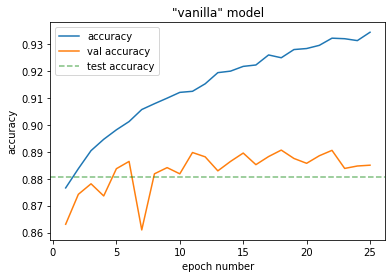

In [50]:
basic_accuracy = basic_model_history.history['accuracy']
basic_val_accuracy = basic_model_history.history['val_accuracy']
basic_loss = basic_model_history.history['loss']
basic_val_loss = basic_model_history.history['val_loss']

plt.plot(range(1, len(basic_accuracy) + 1), basic_accuracy, label = 'accuracy')
plt.plot(range(1, len(basic_val_accuracy) + 1), basic_val_accuracy, label = 'val accuracy')
plt.axhline(y = basic_model_score[1], color = 'g', linestyle='--', label = 'test accuracy', alpha = 0.5)
plt.xlabel('epoch number')
plt.ylabel('accuracy')
plt.title('\"vanilla\" model')
plt.legend()

The training accuracy does not align well with the validation or test accuracy as the number of epochs increases.

It takes a few epochs for the training accuracy to ramp up.

This could mean that there is some level of overfitting occuring on the training set.

## Drop-out model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

dropout_model = Sequential(
    [
        # 1st hidden layer
        Dense(392, input_shape = (784, )),
        Activation('relu'),
        Dropout(0.5), 
     
        # 2nd hidden layer
        Dense(98),
        Activation('relu'),
        Dropout(0.5),
     
        # 3rd hidden layer
        Dense(24),
        Activation('relu'),
        Dropout(0.5),
     
        # Output layer
        Dense(10),
        Activation('softmax')
    ]
)

In [ ]:
dropout_model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [30]:
# Validation split = 1/6 gives us 10000 samples since we 60000 training samples
dropout_model_history = dropout_model.fit(X_train, y_train, batch_size = 8, epochs = 25, verbose = 1, validation_split = 1/6)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 24s 476us/step - loss: 1.0363 - accuracy: 0.5962 - val_loss: 0.6172 - val_accuracy: 0.7254
Epoch 2/25
50000/50000 [==============================] - 23s 469us/step - loss: 0.7838 - accuracy: 0.6883 - val_loss: 0.5846 - val_accuracy: 0.7349
Epoch 3/25
50000/50000 [==============================] - 23s 462us/step - loss: 0.7407 - accuracy: 0.7046 - val_loss: 0.5580 - val_accuracy: 0.7644
Epoch 4/25
50000/50000 [==============================] - 23s 463us/step - loss: 0.7177 - accuracy: 0.7197 - val_loss: 0.5467 - val_accuracy: 0.7862
Epoch 5/25
50000/50000 [==============================] - 23s 462us/step - loss: 0.6847 - accuracy: 0.7381 - val_loss: 0.5273 - val_accuracy: 0.8031
Epoch 6/25
50000/50000 [==============================] - 23s 460us/step - loss: 0.6678 - accuracy: 0.7578 - val_loss: 0.4960 - val_accuracy: 0.8308
Epoch 7/25
50000/50000 [==============================] 

In [51]:
dropout_model_score = dropout_model.evaluate(X_test, y_test)
print("Drop-out model test loss: {:.3f}".format(dropout_model_score[0]))
print("Drop-out model test accuracy: {:.3f}".format(dropout_model_score[1]))

10000/10000 [==============================] - 0s 48us/step
Drop-out model test loss: 0.466
Drop-out model test accuracy: 0.853


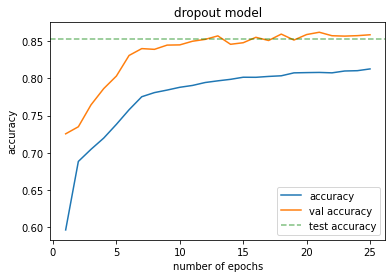

In [52]:
dropout_accuracy = dropout_model_history.history['accuracy']
dropout_val_accuracy = dropout_model_history.history['val_accuracy']
dropout_loss = dropout_model_history.history['loss']
dropout_val_loss = dropout_model_history.history['val_loss']

plt.plot(range(1, len(dropout_accuracy) + 1), dropout_accuracy, label = 'accuracy')
plt.plot(range(1, len(dropout_val_accuracy) + 1), dropout_val_accuracy, label = 'val accuracy')
plt.axhline(y = dropout_model_score[1], color = 'g', linestyle='--', label = 'test accuracy', alpha = 0.5)
plt.xlabel('number of epochs')
plt.ylabel('accuracy')
plt.title('dropout model')
plt.legend()

It takes a few epochs (5-7) for the training accuracy to ramp up.

The test accuracy is higher than the training accuracy.

This could mean that the model is more robust and does not overfit on the training set when compared to the "vanilla" model.

## Batch Normalization model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization

bn_model = Sequential(
    [
        # 1st hidden layer
        Dense(196, input_shape = (784, )),
        Activation('relu'),
        BatchNormalization(),
     
        # 2nd hidden layer
        Dense(49),
        Activation('relu'),
        BatchNormalization(),
     
        # Output layer
        Dense(10),
        Activation('softmax')
    ]
)

In [ ]:
bn_model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [35]:
# Validation split = 1/6 gives us 10000 samples since we 60000 training samples
bn_model_history = bn_model.fit(X_train, y_train, batch_size = 8, epochs = 25, verbose = 1, validation_split = 1/6)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 30s 594us/step - loss: 0.6259 - accuracy: 0.7822 - val_loss: 0.4426 - val_accuracy: 0.8358
Epoch 2/25
50000/50000 [==============================] - 30s 598us/step - loss: 0.5141 - accuracy: 0.8203 - val_loss: 0.4619 - val_accuracy: 0.8413
Epoch 3/25
50000/50000 [==============================] - 30s 595us/step - loss: 0.4788 - accuracy: 0.8310 - val_loss: 0.4149 - val_accuracy: 0.8556
Epoch 4/25
50000/50000 [==============================] - 30s 596us/step - loss: 0.4583 - accuracy: 0.8380 - val_loss: 0.4319 - val_accuracy: 0.8470
Epoch 5/25
50000/50000 [==============================] - 30s 607us/step - loss: 0.4444 - accuracy: 0.8419 - val_loss: 0.3860 - val_accuracy: 0.8603
Epoch 6/25
50000/50000 [==============================] - 29s 582us/step - loss: 0.4309 - accuracy: 0.8468 - val_loss: 0.3997 - val_accuracy: 0.8605
Epoch 7/25
50000/50000 [==============================] 

In [53]:
bn_model_score = bn_model.evaluate(X_test, y_test)
print("Batch Normalization model test loss: {:.3f}".format(bn_model_score[0]))
print("Batch Normalization model test accuracy: {:.3f}".format(bn_model_score[1]))

10000/10000 [==============================] - 1s 59us/step
Batch Normalization model test loss: 0.372
Batch Normalization model test accuracy: 0.867


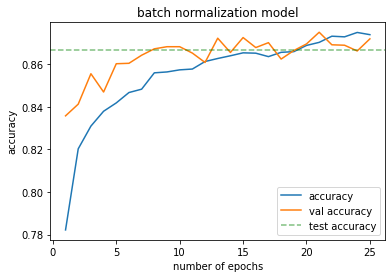

In [54]:
bn_accuracy = bn_model_history.history['accuracy']
bn_val_accuracy = bn_model_history.history['val_accuracy']
bn_loss = bn_model_history.history['loss']
bn_val_loss = bn_model_history.history['val_loss']

plt.plot(range(1, len(bn_accuracy) + 1), bn_accuracy, label = 'accuracy')
plt.plot(range(1, len(bn_val_accuracy) + 1), bn_val_accuracy, label = 'val accuracy')
plt.axhline(y = bn_model_score[1], color = 'g', linestyle='--', label = 'test accuracy', alpha = 0.5)
plt.xlabel('number of epochs')
plt.ylabel('accuracy')
plt.title('batch normalization model')
plt.legend()

The training accuracy ramps up very quickly compared to the previous models (2-3 epochs compared to the dropout model).

The test accuracy is higher than the training accuracy for up to 20 epochs. This could mean that the model is more robust and does not overfit on the training set when compared to the "vanilla" model.

## Batch Normalization with Drop-out model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization

bn_dp_model = Sequential(
    [
        # 1st hidden layer
        Dense(196, input_shape = (784, )),
        Activation('relu'),
        Dropout(0.5),
        BatchNormalization(),
     
        # 2nd hidden layer
        Dense(49),
        Activation('relu'),
        Dropout(0.5),
        BatchNormalization(),
     
        # Output layer
        Dense(10),
        Activation('softmax')
    ]
)

In [ ]:
bn_dp_model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [46]:
# Validation split = 1/6 gives us 10000 samples since we 60000 training samples
bn_dp_model_history = bn_dp_model.fit(X_train, y_train, batch_size = 8, epochs = 25, verbose = 1, validation_split = 1/6)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 30s 610us/step - loss: 1.3851 - accuracy: 0.4891 - val_loss: 0.8219 - val_accuracy: 0.7360
Epoch 2/25
50000/50000 [==============================] - 31s 620us/step - loss: 1.1802 - accuracy: 0.5575 - val_loss: 0.7442 - val_accuracy: 0.7584
Epoch 3/25
50000/50000 [==============================] - 31s 620us/step - loss: 1.1105 - accuracy: 0.5884 - val_loss: 0.7264 - val_accuracy: 0.7558
Epoch 4/25
50000/50000 [==============================] - 32s 634us/step - loss: 1.1004 - accuracy: 0.5929 - val_loss: 0.7413 - val_accuracy: 0.7495
Epoch 5/25
50000/50000 [==============================] - 31s 618us/step - loss: 1.0750 - accuracy: 0.6034 - val_loss: 0.8034 - val_accuracy: 0.7114
Epoch 6/25
50000/50000 [==============================] - 30s 602us/step - loss: 1.0852 - accuracy: 0.5984 - val_loss: 0.7065 - val_accuracy: 0.7343
Epoch 7/25
50000/50000 [==============================] 

In [47]:
bn_dp_model_score = bn_dp_model.evaluate(X_test, y_test)
print("Batch Normalization with Drop-out model test loss: {:.3f}".format(bn_dp_model_score[0]))
print("Batch Normalization with Drop-out model test accuracy: {:.3f}".format(bn_dp_model_score[1]))

10000/10000 [==============================] - 1s 64us/step
Test loss: 0.646
Test Accuracy: 0.768


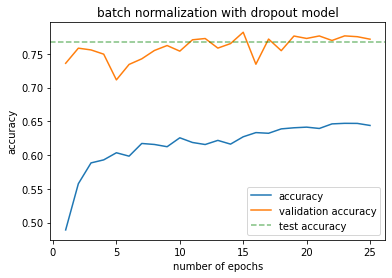

In [48]:
bn_dp_accuracy = bn_dp_model_history.history['accuracy']
bn_dp_val_accuracy = bn_dp_model_history.history['val_accuracy']
bn_dp_loss = bn_dp_model_history.history['loss']
bn_dp_val_loss = bn_dp_model_history.history['val_loss']

plt.plot(range(1, len(bn_dp_accuracy) + 1), bn_dp_accuracy, label = 'accuracy')
plt.plot(range(1, len(bn_dp_val_accuracy) + 1), bn_dp_val_accuracy, label = 'validation accuracy')
plt.axhline(y = bn_dp_model_score[1], color = 'g', linestyle='--', label = 'test accuracy', alpha = 0.5)
plt.xlabel('number of epochs')
plt.ylabel('accuracy')
plt.title('batch normalization with dropout model')
plt.legend()

## Comparison of "vanilla" model with the other models

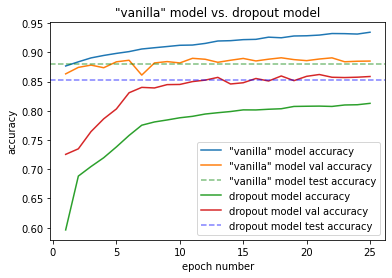

In [55]:
# "vanilla" model vs. dropout model

# "vanilla" model
plt.plot(range(1, len(basic_accuracy) + 1), basic_accuracy, label = '\"vanilla\" model accuracy')
plt.plot(range(1, len(basic_val_accuracy) + 1), basic_val_accuracy, label = '\"vanilla\" model val accuracy')
plt.axhline(y = basic_model_score[1], color = 'g', linestyle='--', label = '\"vanilla\" model test accuracy', alpha = 0.5)

# dropout model
plt.plot(range(1, len(dropout_accuracy) + 1), dropout_accuracy, label = 'dropout model accuracy')
plt.plot(range(1, len(dropout_val_accuracy) + 1), dropout_val_accuracy, label = 'dropout model val accuracy')
plt.axhline(y = dropout_model_score[1], color = 'b', linestyle='--', label = 'dropout model test accuracy', alpha = 0.5)

plt.xlabel('epoch number')
plt.ylabel('accuracy')
plt.title('\"vanilla\" model vs. dropout model')
plt.legend()

Training the dropout model took a bit longer than training the "vanilla" model since we had added more layer(s).

The test accuracy for the "vanilla" model is higher than the test accuracy for the dropout model which might indicate that our dropout model needs to be trained for a larger number of epochs.

It may be the case that the dropout model is more robust than the "vanilla" model since it forces the neurons in the hidden layers to account for the neurons being dropped leading to higher generalization.

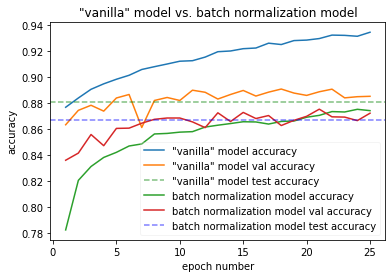

In [61]:
# "vanilla" model vs. batch normalization model

# "vanilla" model
plt.plot(range(1, len(basic_accuracy) + 1), basic_accuracy, label = '\"vanilla\" model accuracy')
plt.plot(range(1, len(basic_val_accuracy) + 1), basic_val_accuracy, label = '\"vanilla\" model val accuracy')
plt.axhline(y = basic_model_score[1], color = 'g', linestyle='--', label = '\"vanilla\" model test accuracy', alpha = 0.5)

# batch normalization model
plt.plot(range(1, len(bn_accuracy) + 1), bn_accuracy, label = 'batch normalization model accuracy')
plt.plot(range(1, len(bn_val_accuracy) + 1), bn_val_accuracy, label = 'batch normalization model val accuracy')
plt.axhline(y = bn_model_score[1], color = 'b', linestyle='--', label = 'batch normalization model test accuracy', alpha = 0.5)

plt.xlabel('epoch number')
plt.ylabel('accuracy')
plt.title('\"vanilla\" model vs. batch normalization model')
plt.legend(framealpha = 0.2)

Training the batch normalization model took a lot longer than training the "vanilla" model since we added another step in-between the hidden layers.

However, as mentioned above, it "comes online" very quickly (2-3 epochs) compared to the "vanilla" model and the dropout model.

Similar to the dropout model, the test accuracy for the batch normalization model is lower than that of the "vanilla" model which might indicate that our batch normalization model needs to be trained for a larger number of epochs.

Also, it may be the case that the batch normalization model is more robust than the "vanilla" model since we're basically applying a StandardScaler to the activation in each layer allowing for quicker convergence to the optimum.

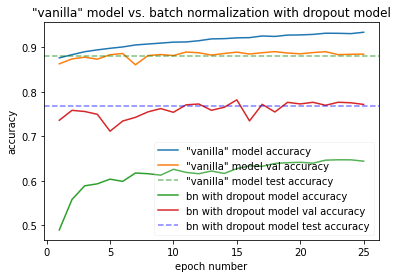

In [60]:
# "vanilla" model vs. batch normalization with dropout model

# "vanilla" model
plt.plot(range(1, len(basic_accuracy) + 1), basic_accuracy, label = '\"vanilla\" model accuracy')
plt.plot(range(1, len(basic_val_accuracy) + 1), basic_val_accuracy, label = '\"vanilla\" model val accuracy')
plt.axhline(y = basic_model_score[1], color = 'g', linestyle='--', label = '\"vanilla\" model test accuracy', alpha = 0.5)

# batch normalization with dropout model
plt.plot(range(1, len(bn_dp_accuracy) + 1), bn_dp_accuracy, label = 'bn with dropout model accuracy')
plt.plot(range(1, len(bn_dp_val_accuracy) + 1), bn_dp_val_accuracy, label = 'bn with dropout model val accuracy')
plt.axhline(y = bn_dp_model_score[1], color = 'b', linestyle='--', label = 'bn with dropout model test accuracy', alpha = 0.5)

plt.xlabel('epoch number')
plt.ylabel('accuracy')
plt.title('\"vanilla\" model vs. batch normalization with dropout model')
plt.legend(loc = 'lower right', framealpha = 0.2)

Training the batch normalization with dropout model took almost the same time as training the batch normalization model since we did not add any additional layers and only included dropout in each hidden layer.

It performs very poorly when compared to the "vanilla" model.

Perhaps it can be improved by choosing different number of hidden layer nodes and different number of layers.

As it stands now, this is not a good model when compared to the "vanilla" model.

# References

[Dataset](https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles)


[Drop-out](https://www.machinecurve.com/index.php/2019/12/18/how-to-use-dropout-with-keras/#)

